In [16]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN_test import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
filelist = ['Audio/1-1.wav',
            'Audio/1-2.wav',
            'Audio/2-1.wav',
            'Audio/2-2.wav',
            'Audio/4-1.wav',
            'Audio/4-2.wav',
            'Audio/6-1.wav',
            'Audio/6-2.wav',
            'Audio/8-1.wav',
            'Audio/8-2.wav',
            'Audio/9-1.wav',
            'Audio/9-2.wav',
            ]
info = WAVreader(filelist, [0,0,4,4,5,5,1,1,2,2,3,3], 0.05)
data = info.dataset

14.4615
Scaled 1005 windows down to 751
Finished file Audio/1-1.wav
14.603
Scaled 1013 windows down to 763
Finished file Audio/1-2.wav
14.6035
Scaled 883 windows down to 756
Finished file Audio/2-1.wav
14.1525
Scaled 895 windows down to 789
Finished file Audio/2-2.wav
14.6025
Scaled 806 windows down to 651
Finished file Audio/4-1.wav
13.49
Scaled 1574 windows down to 1159
Finished file Audio/4-2.wav
14.6035
Scaled 963 windows down to 821
Finished file Audio/6-1.wav
14.6025
Scaled 1321 windows down to 1081
Finished file Audio/6-2.wav
14.6015
Scaled 1154 windows down to 916
Finished file Audio/8-1.wav
14.6015
Scaled 1682 windows down to 1194
Finished file Audio/8-2.wav
16.288
Scaled 1091 windows down to 830
Finished file Audio/9-1.wav
16.2875
Scaled 2004 windows down to 1374
Finished file Audio/9-2.wav

Final data set consists of 11037 windows over 6 classes


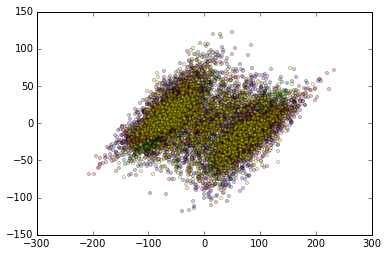

In [3]:
colors = ['red','blue','green','purple','orange','yellow','brown','black']

pull = info.concatset
X = [dat[0] for dat in pull]
labels = [(dat[1]+0.0)/info.length*2 for dat in info.concatset]
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.transform(X)
figure()
for label in range(info.numClasses):
    series = [newX[i] for i in range(len(newX)) if pull[i][1]==label]
    scatter([x[0] for x in series], [x[1] for x in series],c=colors[label],alpha=0.25,s=10)
show()

In [4]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 == 2: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(11037, 1104)


In [40]:
NTN = ShallowNeuralNetwork(input_dim=79, hidden_dim=27)
NTN.train(trainset, maxiter=61, alpha=0.0001, lmbda=0.00001, display_progress=True)

completed iteration 0; error is 1561.49630291; size is 0.176239194949
completed iteration 10; error is 620.244807284; size is 12.5931799972
completed iteration 20; error is 511.439853169; size is 17.8995196843
completed iteration 30; error is 457.892315284; size is 20.921190102
completed iteration 40; error is 397.333790598; size is 23.6222812932
completed iteration 50; error is 356.079813515; size is 25.2539798169
completed iteration 60; error is 326.331006146; size is 26.3745990361


In [41]:
print NTN.accuracy(trainset), NTN.accuracy(testset)

0.952198852772 0.885386819484


In [13]:
SNN = SoftmaxNeuralNetwork(input_dim=79, output_dim=info.numClasses)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
SNN.train(trainset, maxiter=301, display_progress=True, anneal=lambda x: .01/(100+50*x))

completed iteration 0; error is 8183.0; size is 0.177720046864
completed iteration 10; error is 6680.0; size is 0.200160615048
completed iteration 20; error is 6165.0; size is 0.196353482376
completed iteration 30; error is 6018.0; size is 0.193812757939
completed iteration 40; error is 5864.0; size is 0.192039118831
completed iteration 50; error is 5855.0; size is 0.190729791529
completed iteration 60; error is 5843.0; size is 0.189698332859
completed iteration 70; error is 5781.0; size is 0.18884948815
completed iteration 80; error is 5700.0; size is 0.18814684349
completed iteration 90; error is 5656.0; size is 0.18752053101
completed iteration 100; error is 5692.0; size is 0.186999968112
completed iteration 110; error is 5681.0; size is 0.186550825818
completed iteration 120; error is 5572.0; size is 0.186144099198
completed iteration 130; error is 5551.0; size is 0.185789966669
completed iteration 140; error is 5550.0; size is 0.185470835422
completed iteration 150; error is 5624.

In [14]:
# 2-class, alpha=.001, lmbda=.0001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.458773784355 0.451086956522


Confusion matrix
[[ 85   2  39  20   4   1]
 [ 12  39  60  59  15   4]
 [ 18   1 164  23   1   3]
 [ 12   5  49 127  10  17]
 [  4   6  26  69  41   8]
 [  1  10  31  85  11  42]]


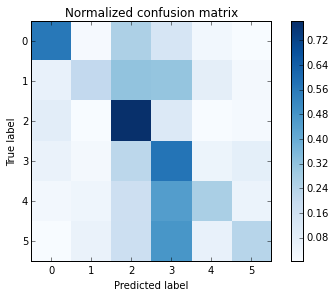

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ytrue = []
ypred = []
for clip in testset:
    SNN.forward_propagation(clip[0])
    ypred.append(np.argmax(SNN.predictions))
    ytrue.append(np.argmax(clip[1]))
confusion=confusion_matrix(ytrue, ypred)
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

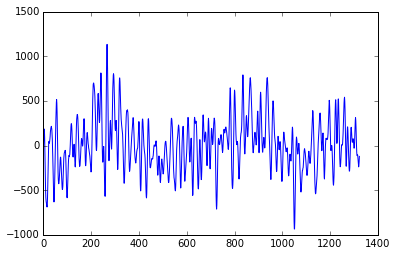

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()